<a href="https://colab.research.google.com/github/a-gasior/DSA/blob/master/LinearSeparableTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = 'drive/My Drive/Data Solution Analyst Case Study/Data/cleaned_data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
x_discrete = pd.read_csv(data_path+'X_discrete.csv')
x_continuous = pd.read_csv(data_path+'X_continuous.csv')
y = pd.read_csv(data_path+'y_all.csv')

x_continuous.drop('duration',axis=1,inplace=True)

X_whole = pd.concat([x_continuous,x_discrete],axis=1)
y_actual = y.loc[:,'y']
X = X_whole.values

In [55]:
X.shape

(41188, 19)

In [56]:
y_actual.shape

(41188,)

In [67]:
clf = make_pipeline(StandardScaler(),LinearSVC(max_iter=1,C=10))

In [68]:
clf.fit(X,y_actual)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [69]:
y_pred = []
for sample in X:
  y_pred.append(clf.predict(sample.reshape(-1,19))[0])



In [70]:
num_right = 0
for act,pred in zip(y_actual,y_pred):
  if act == pred:
    num_right += 1

print('Accuracy: '+str(num_right/X.shape[0])+'%')

Accuracy: 0.8545207341944255%


In [ ]:
able = num_right/X.shape[0]
round(able,2)

In [4]:
accuracies = []
for num_iters in range(0,2000,200):
  clf = make_pipeline(StandardScaler(),LinearSVC(max_iter=num_iters,C=10))
  # C parameter tells the SVM optimization how much you want to avoid misclassifying each training example
  clf.fit(X,y_actual)

  y_pred = []
  for sample in X:
    y_pred.append(clf.predict(sample.reshape(-1,19))[0])

  num_right = 0
  for act,pred in zip(y_actual,y_pred):
    if act == pred:
      num_right += 1

  accuracies.append((num_iters,round(num_right/X.shape[0],2)))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [5]:
acc_tup = list(zip(*accuracies))

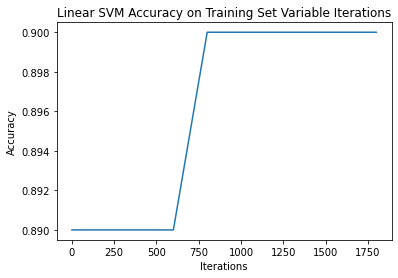

In [9]:
import matplotlib.pyplot as plt

plt.plot(acc_tup[0],acc_tup[1])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Linear SVM Accuracy on Training Set Variable Iterations')

plt.savefig('drive/My Drive/Data Solution Analyst Case Study/images/notLineralySeperablePart2')